# Response modelling

Based on:<br/>
[Introduction to Algorithmic Marketing: Artificial Intelligence for Marketing Operations](https://algorithmicweb.files.wordpress.com/2018/07/algorithmic-marketing-ai-for-marketing-operations-r1-7g.pdf)<br/>
[The True Lift Model - A Novel Data Mining Approach to Response Modeling in Database Marketing.](https://www.researchgate.net/publication/220520042_The_True_Lift_Model_-_A_Novel_Data_Mining_Approach_to_Response_Modeling_in_Database_Marketing)

In [1]:
from sklearn.linear_model import LogisticRegression

import data as dt
import plots as p
import methodologies as mtd

### Config

In [2]:
# sample size
N_TEST = 80_000
N_CONTROL = 20_000

# param dist
MU = [1, 1, 1]
COV = None

# ground truth
TREATMENT_TRUTH = [-4.5, 1.5, 0.8, 1.2]
CONTROL_TRUTH = [-5, 1.3, 0.8, 1]

MODEL = LogisticRegression(penalty='none', solver='newton-cg')
MODEL_MULTI = LogisticRegression(solver='newton-cg', multi_class='multinomial')

### Synthetic dataset

In [3]:
X, y_true, y = dt.generate_logistic_data(TREATMENT_TRUTH,
                                         CONTROL_TRUTH,
                                         N_TEST,
                                         N_CONTROL,
                                         MU,
                                         COV)

### Standard approach

In [4]:
res_standard = mtd.standard_approach(X, y_true, y, MODEL)
res_standard.head()

,y,y_true,y_pred,treatment
0,1,0.725347,0.726446,1.0
1,0,0.222729,0.222730,1.0
2,1,0.107652,0.110040,1.0
3,0,0.049171,0.048580,1.0
4,0,0.108496,0.110821,1.0


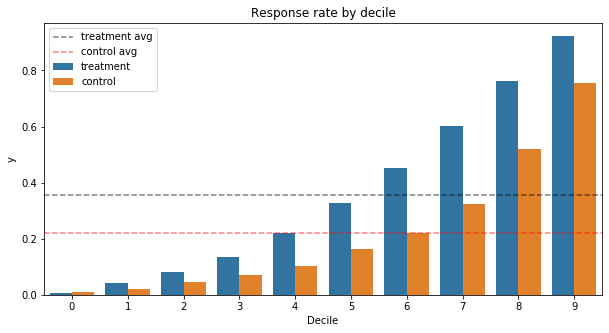

In [5]:
p.response_plot(res_standard)

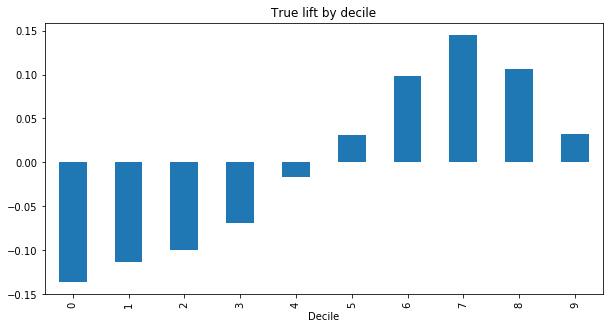

In [6]:
p.true_lift(res_standard)

### TrueLift approach

In [7]:
res_true_lift = mtd.true_lift_approach(X, y_true, y, MODEL)
res_true_lift.head()

,y,y_true,y_pred,treatment
0,0,0.033122,0.014051,1.0
1,0,0.222729,0.111538,1.0
2,1,0.107652,0.048131,1.0
3,0,0.165159,0.078733,1.0
4,1,0.332595,0.140102,1.0


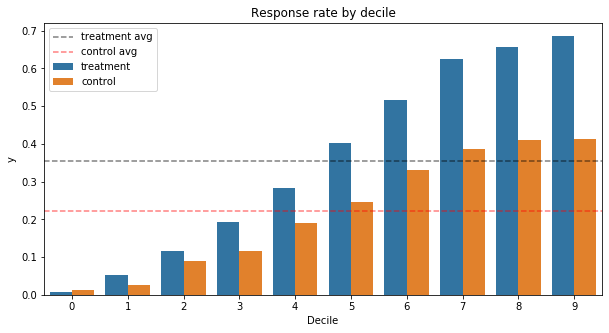

In [8]:
p.response_plot(res_true_lift)

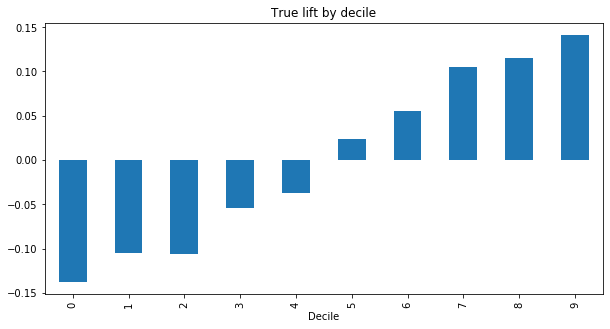

In [9]:
p.true_lift(res_true_lift)

### Multiclass approach

In [10]:
res_multiclass = mtd.multi_class_approach(X, y_true, y, MODEL_MULTI)
res_multiclass.head()

,y,y_true,y_pred,treatment
0,0,0.033122,0.016086,1.0
1,1,0.725347,0.182043,1.0
2,0,0.075367,0.068083,1.0
3,0,0.222729,0.149510,1.0
4,0,0.165159,0.118250,1.0


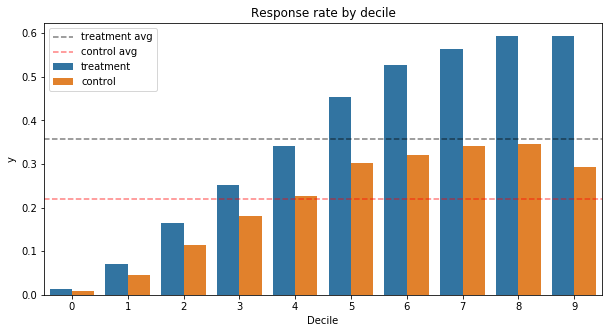

In [11]:
p.response_plot(res_multiclass)

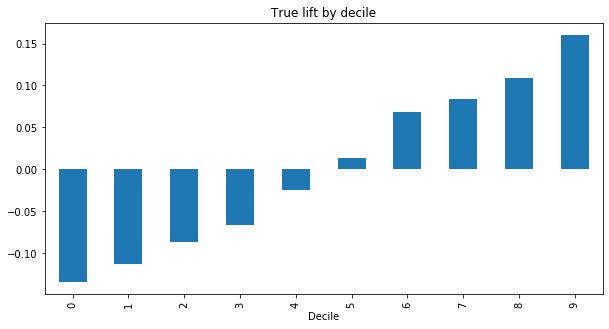

In [12]:
p.true_lift(res_multiclass)